In [1]:
import numpy as np
import pandas as pd
import ut_lvcm.reservoirs as reservoirs
import ut_lvcm.utils as utils
import sempler
import os
import pickle
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def read_result(filename):
    if os.path.getsize(filename) > 0:
        with open(filename, "rb") as f:
            return pickle.load(f)

In [3]:
# Set tex formatting for plots
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Computer Modern Roman']})
rc('text', usetex=True)
#plt.rcParams["font.family"] = "serif"
#plt.rcParams["font.serif"] = ["Computer Modern Roman"]

# Set legend size
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')

## Results

### p=10, h in [0,1,2,3] with GES on first environment, but with 70/30 split

ĥ : 1
Î : {1, 4, 5, 6, 9}
# edges : 7
edges in initial graphs: [14]
IMEC size: 1


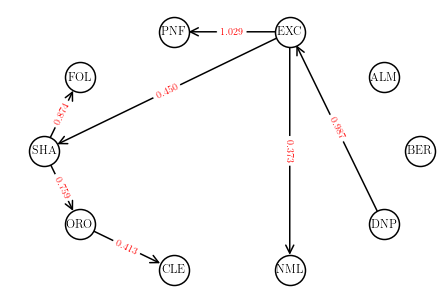

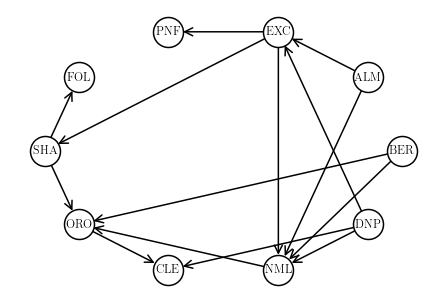

min(abs(B))= 0.37275656403754637


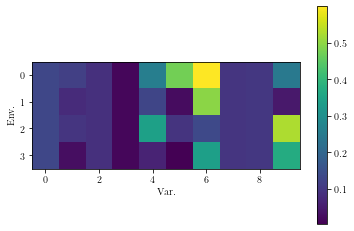

In [4]:
file = "scratch/reservoirs/reservoir_results_1645652324_p:10_prune:True_th:False_ges-obs:True_tag:store_graphs_7030.pickle"
results = read_result(file)
(estimated_model, estimated_I, _), history = results[0]
print("ĥ :", estimated_model.num_latent)
print("Î :", estimated_I)
print("# edges :", estimated_model.A.sum())
print("edges in initial graphs:",history['initial_graphs'].sum(axis=(1,2)))
icpdag = utils.dag_to_icpdag(estimated_model.A, estimated_I)
print("IMEC size:", len(utils.all_dags(icpdag)))
utils.plot_graph(estimated_model.B, labels=reservoirs.node_names[0:10], weights=True)
utils.plot_graph(history['initial_graphs'][0], labels=reservoirs.node_names[0:10])
plt.imshow(estimated_model.omegas)
plt.colorbar()
plt.ylabel("Env.")
plt.xlabel("Var.")
print("min(abs(B))=",abs(estimated_model.B[estimated_model.B != 0]).min())

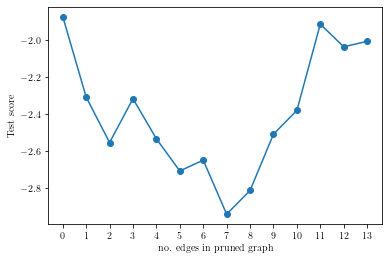

In [5]:
pruned_graphs = results[0][1]['pruned_graphs']
test_scores = [s for s,_ in pruned_graphs]
no_edges = [np.sum(A) for _,A in pruned_graphs]
plt.plot(no_edges,test_scores, marker='o')
plt.xlabel("no. edges in pruned graph")
plt.ylabel("Test score")
plt.gca().set_xticks(list(range(max(no_edges)+1)))
None

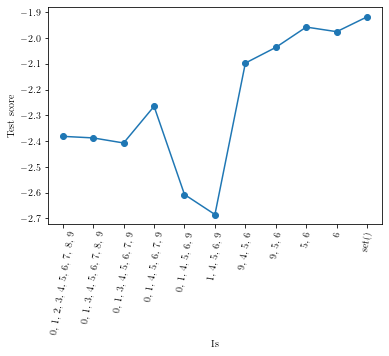

In [6]:
pruned_Is = results[0][1]['pruned_Is']
test_scores = [s for s,_,_ in pruned_Is]
Is = [I for _,_,I in pruned_Is]
plt.plot(test_scores, marker='o')
plt.xlabel("Is")
plt.ylabel("Test score")
plt.gca().set_xticks(list(range(len(Is))))
plt.gca().set_xticklabels(["%s" % i for i in Is])
plt.xticks(rotation=80)
None

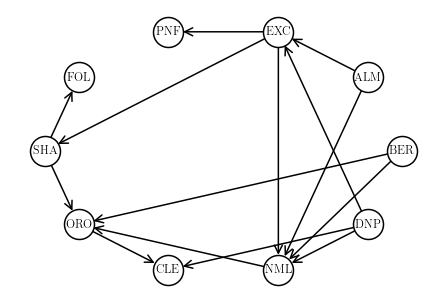

In [7]:
# Initial graph
utils.plot_graph(results[0][1]['cpdag'], labels=reservoirs.node_names[0:10])

### Comparing the effect of different random splits

In [8]:
splits = 10
path = "scratch/reservoirs/"
files = [
    "reservoir_results_1645788433_p:10_prune:True_th:False_ges-obs:True_tag:multisplit_0_random_state:0.pickle",
    "reservoir_results_1645788530_p:10_prune:True_th:False_ges-obs:True_tag:multisplit_1_random_state:1.pickle",
    "reservoir_results_1645788621_p:10_prune:True_th:False_ges-obs:True_tag:multisplit_2_random_state:2.pickle",
    "reservoir_results_1645788736_p:10_prune:True_th:False_ges-obs:True_tag:multisplit_3_random_state:3.pickle",
    "reservoir_results_1645788787_p:10_prune:True_th:False_ges-obs:True_tag:multisplit_4_random_state:4.pickle",
    "reservoir_results_1645788909_p:10_prune:True_th:False_ges-obs:True_tag:multisplit_5_random_state:5.pickle",
    "reservoir_results_1645789017_p:10_prune:True_th:False_ges-obs:True_tag:multisplit_6_random_state:6.pickle",
    "reservoir_results_1645789103_p:10_prune:True_th:False_ges-obs:True_tag:multisplit_7_random_state:7.pickle",
    "reservoir_results_1645789429_p:10_prune:True_th:False_ges-obs:True_tag:multisplit_8_random_state:8.pickle",
    "reservoir_results_1645789480_p:10_prune:True_th:False_ges-obs:True_tag:multisplit_9_random_state:9.pickle"]


---------------------
Split no. 1
ĥ : 3
Î : {0, 1, 2, 3, 4, 5, 6, 9}
# edges : 7
edges in initial graphs: [15 15]
IMEC size: 1


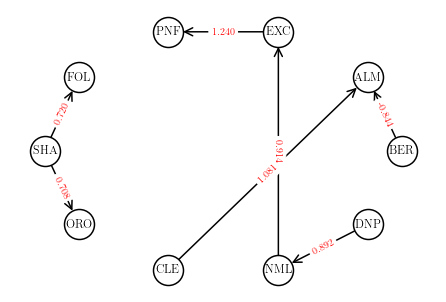

min(abs(B))= 0.7078964864251975

---------------------
Split no. 2
ĥ : 2
Î : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
# edges : 11
edges in initial graphs: [16]
IMEC size: 1


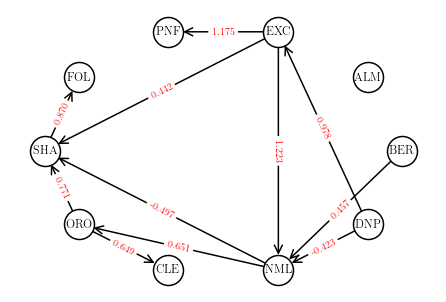

min(abs(B))= 0.42291911098305734

---------------------
Split no. 3
ĥ : 3
Î : {3, 4, 5, 6, 7}
# edges : 10
edges in initial graphs: [14]
IMEC size: 1


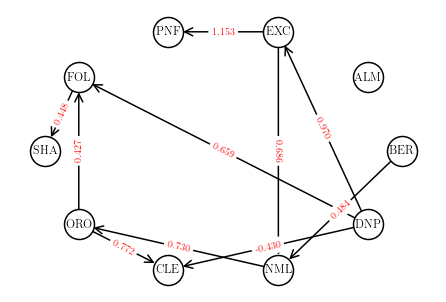

min(abs(B))= 0.42685945323425206

---------------------
Split no. 4
ĥ : 3
Î : {1, 3, 5, 6, 7, 9}
# edges : 10
edges in initial graphs: [13]
IMEC size: 1


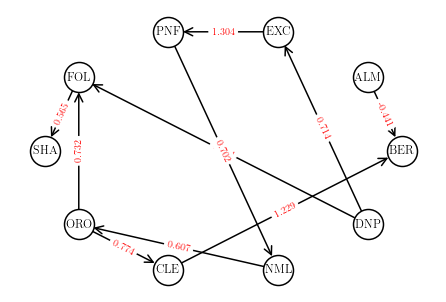

min(abs(B))= 0.31384624006175715

---------------------
Split no. 5
ĥ : 1
Î : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
# edges : 6
edges in initial graphs: [12]
IMEC size: 1


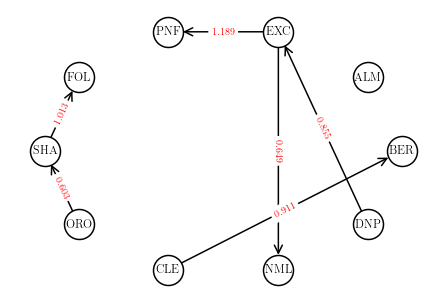

min(abs(B))= 0.6031728401350624

---------------------
Split no. 6
ĥ : 2
Î : {0, 1, 2, 3, 4, 5, 6, 7, 9}
# edges : 9
edges in initial graphs: [14]
IMEC size: 1


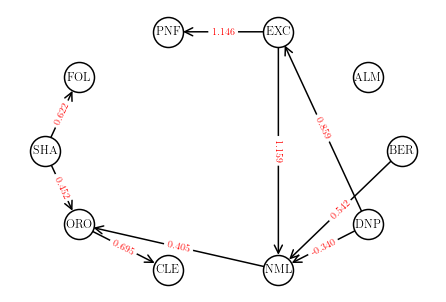

min(abs(B))= 0.33966060655695995

---------------------
Split no. 7
ĥ : 3
Î : {1, 2, 3, 4, 5, 6, 7, 9}
# edges : 7
edges in initial graphs: [13]
IMEC size: 1


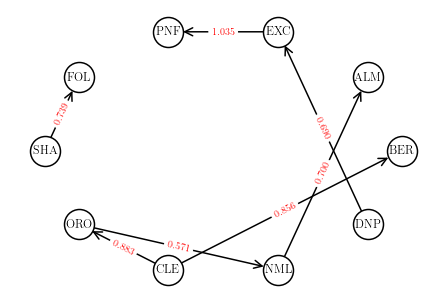

min(abs(B))= 0.5714207449148789

---------------------
Split no. 8
ĥ : 2
Î : {9, 5, 6}
# edges : 10
edges in initial graphs: [13]
IMEC size: 1


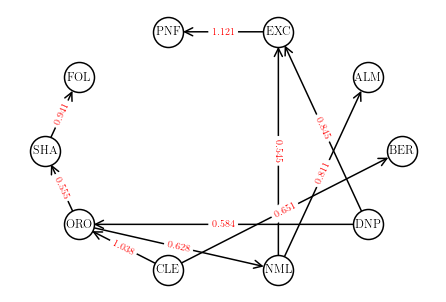

min(abs(B))= 0.5447305302630348

---------------------
Split no. 9
ĥ : 2
Î : {0, 3, 4, 5, 6, 7, 9}
# edges : 10
edges in initial graphs: [14 14 14]
IMEC size: 1


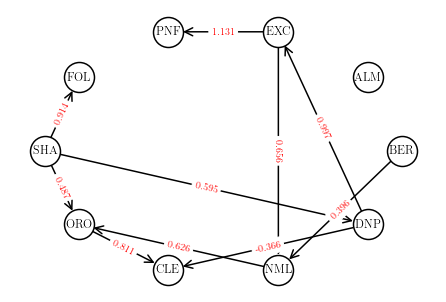

min(abs(B))= 0.36626754084193835

---------------------
Split no. 10
ĥ : 3
Î : {0, 4, 5, 6, 7, 9}
# edges : 7
edges in initial graphs: [13]
IMEC size: 1


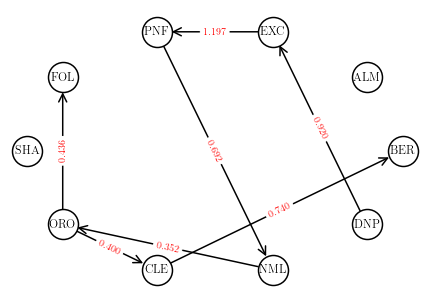

min(abs(B))= 0.35199784760269504


In [9]:
graphs = []
weights = []
Is = []
models = []
for i,file in enumerate(files):
    results = read_result(path + file)
    (estimated_model, estimated_I, _), history = results[0]
    print("\n---------------------")
    print("Split no. %d" % (i + 1))
    print("ĥ :", estimated_model.num_latent)
    print("Î :", estimated_I)
    print("# edges :", estimated_model.A.sum())    
    print("edges in initial graphs:",history['initial_graphs'].sum(axis=(1,2)))
    icpdag = utils.dag_to_icpdag(estimated_model.A, estimated_I)
    print("IMEC size:", len(utils.all_dags(icpdag)))
    utils.plot_graph(estimated_model.B, labels=reservoirs.node_names[0:10], weights=True)
    graphs += list(utils.imec(estimated_model.A, estimated_I))
    weights.append(estimated_model.B)
    Is.append(estimated_I)
    models.append(estimated_model)
    #plt.imshow(estimated_model.omegas)
    #plt.colorbar()
    #plt.ylabel("Env.")
    #plt.xlabel("Var.")
    print("min(abs(B))=",abs(estimated_model.B[estimated_model.B != 0]).min())

**Rate of appearance of each variable as target**

In [10]:
p = 10
rate = np.zeros(p)
print("Estimated I")
for I in Is:
    print(" ",I,[reservoirs.node_names[i] for i in I])
    for i in I:
        rate[i] += 1
rate /= p
print("\nRate of appearance")
for i in range(p):
    print("  %s : %0.2f" % (reservoirs.node_names[i], rate[i]))

Estimated I
  {0, 1, 2, 3, 4, 5, 6, 9} ['SHA', 'ORO', 'CLE', 'NML', 'DNP', 'BER', 'ALM', 'FOL']
  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} ['SHA', 'ORO', 'CLE', 'NML', 'DNP', 'BER', 'ALM', 'EXC', 'PNF', 'FOL']
  {3, 4, 5, 6, 7} ['NML', 'DNP', 'BER', 'ALM', 'EXC']
  {1, 3, 5, 6, 7, 9} ['ORO', 'NML', 'BER', 'ALM', 'EXC', 'FOL']
  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} ['SHA', 'ORO', 'CLE', 'NML', 'DNP', 'BER', 'ALM', 'EXC', 'PNF', 'FOL']
  {0, 1, 2, 3, 4, 5, 6, 7, 9} ['SHA', 'ORO', 'CLE', 'NML', 'DNP', 'BER', 'ALM', 'EXC', 'FOL']
  {1, 2, 3, 4, 5, 6, 7, 9} ['ORO', 'CLE', 'NML', 'DNP', 'BER', 'ALM', 'EXC', 'FOL']
  {9, 5, 6} ['FOL', 'BER', 'ALM']
  {0, 3, 4, 5, 6, 7, 9} ['SHA', 'NML', 'DNP', 'BER', 'ALM', 'EXC', 'FOL']
  {0, 4, 5, 6, 7, 9} ['SHA', 'DNP', 'BER', 'ALM', 'EXC', 'FOL']

Rate of appearance
  SHA : 0.60
  ORO : 0.60
  CLE : 0.50
  NML : 0.80
  DNP : 0.80
  BER : 1.00
  ALM : 1.00
  EXC : 0.80
  PNF : 0.20
  FOL : 0.90


**Rate of appearance of each edge**

Edges ordered by frequency of appearance
   EXC -> PNF : 1.0
   DNP -> EXC : 0.9
   SHA -> FOL : 0.7
   NML -> ORO : 0.6
   ORO -> CLE : 0.6
   EXC -> NML : 0.5
   CLE -> BER : 0.5
   BER -> NML : 0.4
   DNP -> NML : 0.3
   ORO -> FOL : 0.3
   ORO -> SHA : 0.3
   SHA -> ORO : 0.3
   FOL -> SHA : 0.2
   PNF -> NML : 0.2
   DNP -> FOL : 0.2
   DNP -> CLE : 0.2
   NML -> EXC : 0.2
   NML -> ALM : 0.2
   CLE -> ORO : 0.2
   ORO -> NML : 0.2
   EXC -> SHA : 0.1
   ALM -> BER : 0.1
   BER -> ALM : 0.1
   DNP -> ORO : 0.1
   NML -> SHA : 0.1
   CLE -> ALM : 0.1
   SHA -> DNP : 0.1


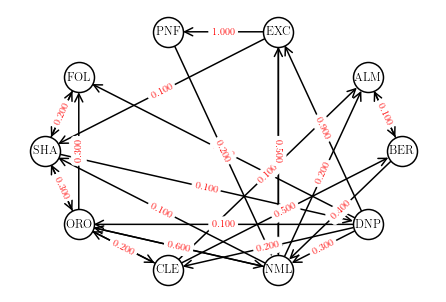

Edges that appear more than 0.50 of the time


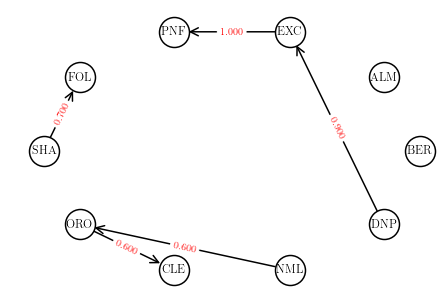

In [11]:
average_edges = np.sum(graphs, axis=0) / len(graphs)
# average_weights = np.sum(graphs, axis=0) / len(graphs)
ordered = sorted([(w,e) for (e,w) in utils.edge_weights(average_edges).items()], reverse=True)
print("Edges ordered by frequency of appearance")
for w, (i,j) in ordered:
    fro = reservoirs.node_names[i]
    to = reservoirs.node_names[j]
    print("  ",fro,"->",to,":",w)
utils.plot_graph(average_edges, labels=reservoirs.node_names[0:10], weights=True)

threshold = 0.5
print("Edges that appear more than %0.2f of the time" % threshold)
aux = np.zeros_like(average_edges)
aux[average_edges > threshold] = average_edges[average_edges > threshold]
utils.plot_graph(aux, labels=reservoirs.node_names[0:10], weights=True)

['SHA$\\rightarrow$FOL', 'ORO$\\rightarrow$CLE', 'NML$\\rightarrow$ORO', 'DNP$\\rightarrow$EXC', 'EXC$\\rightarrow$PNF']


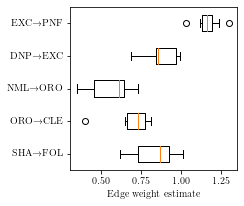

In [12]:
mask = average_edges > threshold
weights = np.array(weights)
edge_estimates = {}
for (fro,to) in utils.directed_edges(mask):
    estimates = weights[:,fro,to]
    edge_estimates[(fro,to)] = estimates[estimates != 0]


plt.figure(figsize=(3,3))
ax = plt.gca()
ax.boxplot(list(edge_estimates.values()), vert=False)

edge_strings = [reservoirs.node_names[fro] + r"$\rightarrow$" + reservoirs.node_names[to] for fro,to in edge_estimates.keys()]
print(edge_strings)

ax.set_yticklabels(edge_strings)
ax.set_xlabel("Edge weight estimate")
plt.savefig("figures/reservoir_estimates.pdf", bbox_inches='tight')

**Highest scoring model over all data**

[84, 24, 24, 24]
Index of best model: 5
Best : -2.6130467790359835


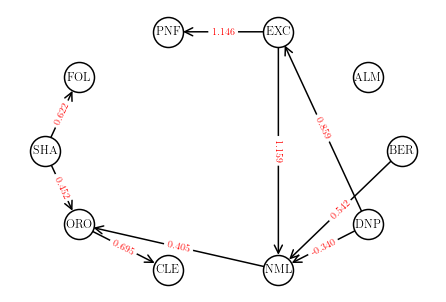

Î = {0, 1, 2, 3, 4, 5, 6, 7, 9}
Î = ['SHA', 'ORO', 'CLE', 'NML', 'DNP', 'BER', 'ALM', 'EXC', 'FOL']
ĥ = 2

Intervention strengths (normalized variances)
   SHA : 0.1860157477978213
   ORO : 0.48758977329263703
   CLE : 0.546928204852517
   NML : 0.6652212393588091
   DNP : 0.09882409381318104
   BER : 0.44774068682435053
   ALM : 0.4363122626834496
   EXC : 0.5818713658061951
   PNF : 0.0
   FOL : 0.2805623479129444


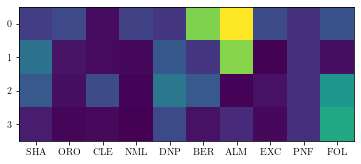

In [24]:
scores = []
p = 10
n_obs = [len(X) for X in reservoirs.data]
sample_covariances = [np.cov(X[:,0:p], rowvar=False) for X in reservoirs.data]
print(n_obs)
for model,I in zip(models,Is):
    score = model.score(sample_covariances, n_obs)
    #print(score)
    scores.append((score, model, I))
index_best = np.argmin([s[0] for s in scores])
print("Index of best model:", index_best)
(best_score, best_model, best_I) = sorted(scores)[0]
print("Best :", best_score)
utils.plot_graph(best_model.B, labels=reservoirs.node_names, weights=True)
print("Î =", best_I)
print("Î =", [reservoirs.node_names[i] for i in best_I])
print("ĥ =", best_model.num_latent)
plt.imshow(best_model.omegas)
plt.gca().set_xticks(range(p))
plt.gca().set_xticklabels(reservoirs.node_names[0:p])
#print("Intervention strengths (variances)")
#for name, var in zip(reservoirs.node_names[0:p],best_model.omegas.var(axis=0)):    
#    print("  ",name,":",var)
print("\nIntervention strengths (normalized variances)")
for name, var in zip(reservoirs.node_names[0:p],utils.normalized_var(best_model.omegas, axis=0)):
    print("  ",name,":",var)

In [14]:
best_model.num_latent

2

### Fitted paramters for all models

In [29]:
for (score, model, I) in sorted(scores):
    print("################################################################################")
    print("MODEL")
    print("  Î =", I)
    print("  score over all data:", score)
    print(model)

################################################################################
MODEL
  Î = {0, 1, 2, 3, 4, 5, 6, 7, 9}
  score over all data: -2.6130467790359835
----------------------------------------------------------------------
Model - p:10 - l:2 - e:4

A:
[[0 1 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

B:
[[ 0.          0.45157585  0.          0.          0.          0.
   0.          0.          0.          0.6222092 ]
 [ 0.          0.          0.69524423  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.40496273  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.    

In [15]:
raise Exception("Stop")

Exception: Stop

### NO LATENTS: Comparing the effect of different random splits

In [ ]:
splits = 10
path = "scratch/reservoirs/"
files = [
"reservoir_results_1646775990_p:10_prune:True_th:False_ges-obs:True_latents:False_random_state:0_tag:multisplit_0.pickle",
"reservoir_results_1646776043_p:10_prune:True_th:False_ges-obs:True_latents:False_random_state:1_tag:multisplit_1.pickle",
"reservoir_results_1646776060_p:10_prune:True_th:False_ges-obs:True_latents:False_random_state:2_tag:multisplit_2.pickle",
"reservoir_results_1646776074_p:10_prune:True_th:False_ges-obs:True_latents:False_random_state:3_tag:multisplit_3.pickle",
"reservoir_results_1646776094_p:10_prune:True_th:False_ges-obs:True_latents:False_random_state:4_tag:multisplit_4.pickle",
"reservoir_results_1646776163_p:10_prune:True_th:False_ges-obs:True_latents:False_random_state:5_tag:multisplit_5.pickle",
"reservoir_results_1646776208_p:10_prune:True_th:False_ges-obs:True_latents:False_random_state:6_tag:multisplit_6.pickle",
"reservoir_results_1646776256_p:10_prune:True_th:False_ges-obs:True_latents:False_random_state:7_tag:multisplit_7.pickle",
"reservoir_results_1646776438_p:10_prune:True_th:False_ges-obs:True_latents:False_random_state:8_tag:multisplit_8.pickle",
"reservoir_results_1646776451_p:10_prune:True_th:False_ges-obs:True_latents:False_random_state:9_tag:multisplit_9.pickle"
]

In [ ]:
graphs = []
weights = []
models = []
Is = []
for i,file in enumerate(files):
    results = read_result(path + file)
    (estimated_model, estimated_I, _), history = results[0]
    print("\n---------------------")
    print("Split no. %d" % (i + 1))
    print("ĥ :", estimated_model.num_latent)
    print("Î :", estimated_I)
    print("# edges :", estimated_model.A.sum())    
    #print("edges in initial graphs:",history['initial_graphs'].sum(axis=(1,2)))
    icpdag = utils.dag_to_icpdag(estimated_model.A, estimated_I)
    print("IMEC size:", len(utils.all_dags(icpdag)))
    utils.plot_graph(estimated_model.B, labels=reservoirs.node_names[0:10], weights=True)
    graphs += list(utils.imec(estimated_model.A, estimated_I))
    weights.append(estimated_model.B)
    Is.append(estimated_I)
    models.append(estimated_model)
    #plt.imshow(estimated_model.omegas)
    #plt.colorbar()
    #plt.ylabel("Env.")
    #plt.xlabel("Var.")
    print("min(abs(B))=",abs(estimated_model.B[estimated_model.B != 0]).min())

**Rate of appearance of each variable as target**

In [ ]:
p = 10
rate = np.zeros(p)
print("Estimated I")
for I in Is:
    print(" ",I)
    for i in I:
        rate[i] += 1
rate /= p
print("\nRate of appearance")
for i in range(p):
    print("  %s : %0.2f" % (reservoirs.node_names[i], rate[i]))

**Rate of appearance of each edge**

In [ ]:
average_edges = np.sum(graphs, axis=0) / len(graphs)
# average_weights = np.sum(graphs, axis=0) / len(graphs)
ordered = sorted([(w,e) for (e,w) in utils.edge_weights(average_edges).items()], reverse=True)
print("Edges ordered by frequency of appearance")
for w, (i,j) in ordered:
    fro = reservoirs.node_names[i]
    to = reservoirs.node_names[j]
    print("  ",fro,"->",to,":",w)
utils.plot_graph(average_edges, labels=reservoirs.node_names[0:10], weights=True)

threshold = 0.5
print("Edges that appear more than %0.2f of the time" % threshold)
aux = np.zeros_like(average_edges)
aux[average_edges > threshold] = average_edges[average_edges > threshold]
utils.plot_graph(aux, labels=reservoirs.node_names[0:10], weights=True)

## Other results

**h selected by cross-validation from [0,1,2]**

In [ ]:
file = "scratch/reservoirs/reservoir_results_1645036725_prune:True_th:False.pickle"
results = read_result(file)
(estimated_model, estimated_I, _), history = results[0]
print("ĥ :", estimated_model.num_latent)
print("Î :", estimated_I)
print("# edges :", estimated_model.A.sum())
utils.plot_graph(estimated_model.A, labels=reservoirs.node_names)

In [ ]:
estimated_model.B

In [ ]:
abs(estimated_model.B[estimated_model.B != 0]).min()

**h selected by cross-validation from [0,1,2,3]**

In [ ]:
file = "scratch/reservoirs/reservoir_results_1645043476_prune:True_th:False.pickle"
results = read_result(file)
(estimated_model, estimated_I, _), history = results[0]
print("ĥ :", estimated_model.num_latent)
print("Î :", estimated_I)
print("# edges :", estimated_model.A.sum())
print("edges in initial graphs:",history['initial_graphs'].sum(axis=(1,2)))
utils.plot_graph(estimated_model.A, labels=reservoirs.node_names)
plt.imshow(estimated_model.omegas)
plt.colorbar()
plt.ylabel("Env.")
plt.xlabel("Var.")
print("min(abs(B))=",abs(estimated_model.B[estimated_model.B != 0]).min())

In [ ]:
abs(estimated_model.B[estimated_model.B != 0]).min()

**h in [0,1,2,3] with GES on first environment**

In [ ]:
file = "scratch/reservoirs/reservoir_results_1645030968_prune:True_th:False_ges-obs:True.pickle"
results = read_result(file)
(estimated_model, estimated_I, _), history = results[0]
print("ĥ :", estimated_model.num_latent)
print("Î :", estimated_I)
print("# edges :", estimated_model.A.sum())
print("edges in initial graphs:",history['initial_graphs'].sum(axis=(1,2)))
utils.plot_graph(estimated_model.A, labels=reservoirs.node_names)
plt.imshow(estimated_model.omegas)
plt.colorbar()
plt.ylabel("Env.")
plt.xlabel("Var.")
print("min(abs(B))=",abs(estimated_model.B[estimated_model.B != 0]).min())

## p=10

**p=10, h in [0,1,2,3] with GES on first environment**

In [ ]:
file = "scratch/reservoirs/reservoir_results_1645652325_p:10_prune:True_th:False_ges-obs:True_tag:store_graphs_5050.pickle"
results = read_result(file)
(estimated_model, estimated_I, test_score), history = results[0]
print("ĥ :", estimated_model.num_latent)
print("Î :", estimated_I)
print("test_score :", test_score)
print("# edges :", estimated_model.A.sum())
print("edges in initial graphs:",history['initial_graphs'].sum(axis=(1,2)))
utils.plot_graph(estimated_model.A, labels=reservoirs.node_names[0:10])
plt.imshow(estimated_model.omegas)
plt.colorbar()
plt.ylabel("Env.")
plt.xlabel("Var.")
print("min(abs(B))=",abs(estimated_model.B[estimated_model.B != 0]).min())

In [ ]:
pruned_graphs = results[0][1]['pruned_graphs']
test_scores = [s for s,_ in pruned_graphs]
no_edges = [np.sum(A) for _,A in pruned_graphs]
plt.plot(no_edges,test_scores, marker='o')
plt.xlabel("np. edges in pruned graph")
plt.ylabel("Test score")
plt.gca().set_xticks(list(range(max(no_edges)+1)))
None

In [ ]:
pruned_Is = results[0][1]['pruned_Is']
test_scores = [s for s,_,_ in pruned_Is]
Is = [I for _,_,I in pruned_Is]
plt.plot(test_scores, marker='o')
plt.xlabel("Is")
plt.ylabel("Test score")
plt.gca().set_xticks(list(range(len(Is))))
plt.gca().set_xticklabels(["%s" % i for i in Is])
plt.xticks(rotation=80)
None

**p=10, h in [0,1,2,3] with GES on all training data**

In [ ]:
file = "scratch/reservoirs/reservoir_results_1645120701_p:10_prune:True_th:False_ges-obs:False_tag:basic10.pickle"
results = read_result(file)
(estimated_model, estimated_I, _), history = results[0]
print("ĥ :", estimated_model.num_latent)
print("Î :", estimated_I)
print("# edges :", estimated_model.A.sum())
print("edges in initial graphs:",history['initial_graphs'].sum(axis=(1,2)))
utils.plot_graph(estimated_model.A, labels=reservoirs.node_names[0:10])
plt.imshow(estimated_model.omegas)
plt.colorbar()
plt.ylabel("Env.")
plt.xlabel("Var.")
print("min(abs(B))=",abs(estimated_model.B[estimated_model.B != 0]).min())

**p=10, h in [0,1,2,3] on only first environment**

In [ ]:
file = "scratch/reservoirs/reservoir_results_1645119310_p:10_prune:True_th:False_ges-obs:True_tag:env0.pickle"
results = read_result(file)
(estimated_model, estimated_I, _), history = results[0]
print("ĥ :", estimated_model.num_latent)
print("Î :", estimated_I)
print("# edges :", estimated_model.A.sum())
print("edges in initial graphs:",history['initial_graphs'].sum(axis=(1,2)))
utils.plot_graph(estimated_model.A, labels=reservoirs.node_names[0:10])
plt.imshow(estimated_model.omegas)
plt.colorbar()
plt.ylabel("Env.")
plt.xlabel("Var.")
print("min(abs(B))=",abs(estimated_model.B[estimated_model.B != 0]).min())

**p=10, h in [0,1,2,3] on only environments 2,3 and 4**

In [ ]:
file = "scratch/reservoirs/reservoir_results_1645119471_p:10_prune:True_th:False_ges-obs:True_tag:envs234.pickle"
results = read_result(file)
(estimated_model, estimated_I, _), history = results[0]
print("ĥ :", estimated_model.num_latent)
print("Î :", estimated_I)
print("# edges :", estimated_model.A.sum())
print("edges in initial graphs:",history['initial_graphs'].sum(axis=(1,2)))
utils.plot_graph(estimated_model.A, labels=reservoirs.node_names[0:10])
plt.imshow(estimated_model.omegas)
plt.colorbar()
plt.ylabel("Env.")
plt.xlabel("Var.")
print("min(abs(B))=",abs(estimated_model.B[estimated_model.B != 0]).min())

**p=10, h in [0,1,2,3] on only environments 3 and 4**

In [ ]:
file = "scratch/reservoirs/reservoir_results_1645119751_p:10_prune:True_th:False_ges-obs:True_tag:envs34.pickle"
results = read_result(file)
(estimated_model, estimated_I, _), history = results[0]
print("ĥ :", estimated_model.num_latent)
print("Î :", estimated_I)
print("# edges :", estimated_model.A.sum())
print("edges in initial graphs:",history['initial_graphs'].sum(axis=(1,2)))
utils.plot_graph(estimated_model.A, labels=reservoirs.node_names[0:10])
plt.imshow(estimated_model.omegas)
plt.colorbar()
plt.ylabel("Env.")
plt.xlabel("Var.")
print("min(abs(B))=",abs(estimated_model.B[estimated_model.B != 0]).min())